# chloride module example

In [1]:
%matplotlib inline
from rational_rc.chloride import ChlorideModel, load_df_D_RCM, C_crit_param, C_eqv_to_C_S_0
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# raw data
class Param: pass

pars_raw = Param()

# source of chloride
# 1) marine
pars_raw.marine = False # True, if it is marine or coastal environment
pars_raw.C_0_M = 18.980 # natural chloride content of sea water [g/l]
  
# 2) de-icing salt (hard to quantify)
pars_raw.C_0_R = 0  # average chloride content of the chloride contaminated water [g/l]
pars_raw.n = 0      # average number of salting events per year [-]
pars_raw.C_R_i = 0  # average amount of chloride spread within one spreading event [g/m2]
pars_raw.h_S_i = 1  # amount of water from rain and melted snow per spreading period [l/m2]

pars_raw.C_eqv_to_C_S_0 = C_eqv_to_C_S_0 # imported correlation function for chloride content from solution to concrete

# exposure condition
pars_raw.exposure_condition = 'splash'  # other types: "submerged", "leakage", "spray"
pars_raw.exposure_condition_geom_sensitive = True
pars_raw.T_real = 273 + 25  # averaged ambient temperature[K]

pars_raw.x_a = 10. # horizontal distance from the roadside [cm]
pars_raw.x_h = 10. # height above road surface [cm]

# material property
pars_raw.D_RCM_test = 'N/A' # RCM test results[m^2/s]
pars_raw.concrete_type = 'Portland cement concrete' # 'Portland cement concrete', 'Portland fly ash cement concrete', 'Blast furnace slag cement concrete'
pars_raw.cement_concrete_ratio = 300./2400.
pars_raw.C_max_option = 'empirical'  # "user_input" - use user input from test.
pars_raw.C_max_user_input = None # Experiment-tested maximum chloride content [wt.-%/concrete]
pars_raw.C_0 = 0 # initial chloride content of the concrete [wt-.%/cement]

pars_raw.C_crit_distrib_param = C_crit_param()  # critical chloride content import from Chloride module 0.6 wt.% cement (mean value)

# or use built-in material property (diffusivity)
pars_raw.option = Param()
pars_raw.option.choose = True # interpolation from built-in diffusivity data table
pars_raw.option.cement_type = 'CEM_I_42.5_R+SF'
pars_raw.option.wc_eqv = 0.4    # equivalent water/binder ratio
pars_raw.option.df_D_RCM_0 = load_df_D_RCM()

Pf(g = R-S < 0) from various methods
    sample count: 0.52233
    g integral: 0.5246345755428972
    R S integral: 0.5252937743345301
    beta_factor: -0.31082423860606573
-0.2711835416643907 0.6046229041573619


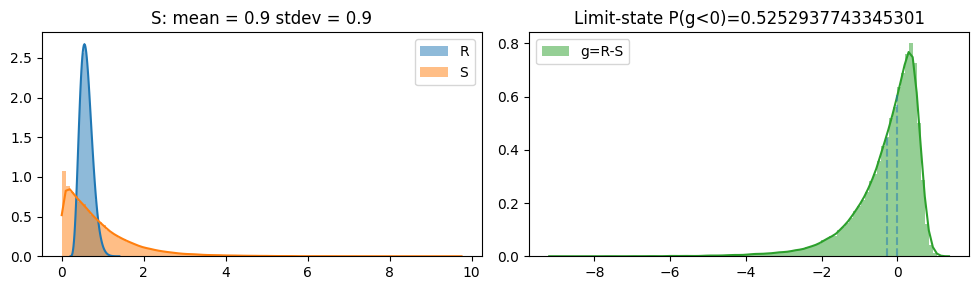

In [3]:
# initialize model
model_cl = ChlorideModel(pars_raw)

# run for 40 mm and 10 year
model_cl.run(x = 40, t = 10)

# postproc
model_cl.postproc(plot=True)

In [4]:
np.mean(model_cl.pf)

0.5252937743345301

In [5]:
# Calibration
# field data at three depth at t = 10 years
chloride_content_field = pd.DataFrame()
chloride_content_field['depth'] = [12.5, 50, 100]  # [mm]
chloride_content_field['cl'] = np.array([0.226, 0.04, 0.014]) / pars_raw.cement_concrete_ratio  # chloride_content[wt.-%/cement]
print(chloride_content_field)

   depth     cl
0   12.5  1.808
1   50.0  0.320
2  100.0  0.112


In [6]:
#calibrate model to the field chloride content
model_cl_cal = model_cl.calibrate(10, chloride_content_field,print_proc=False, plot=False) 

7.785644531250001e-13
2.9011230468750003e-12
2.999267578125e-12


Pf(g = R-S < 0) from various methods
    sample count: 0.24515
    g integral: 0.2480473672756721
    R S integral: 0.24800490212291598
    beta_factor: 0.1871790881877388
0.13648371663527079 0.4542663416745244


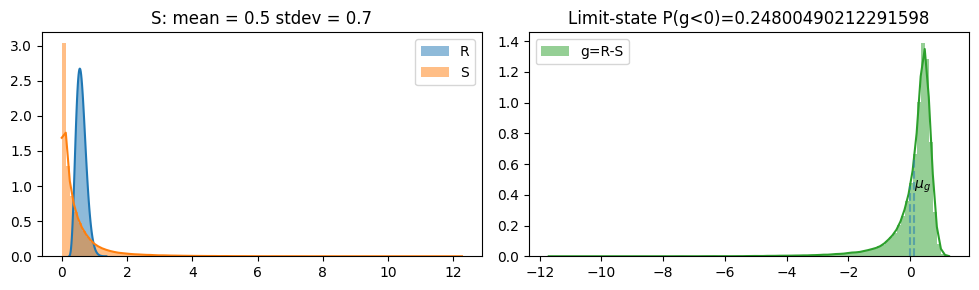

In [7]:
# run the calibrated model for 40 mm and 10 year
model_cl_cal.run(x = 40, t = 10)
model_cl_cal.postproc(plot=True)
# plt.savefig('chloride_at_rebar_40year.pdf',dpi=1200)

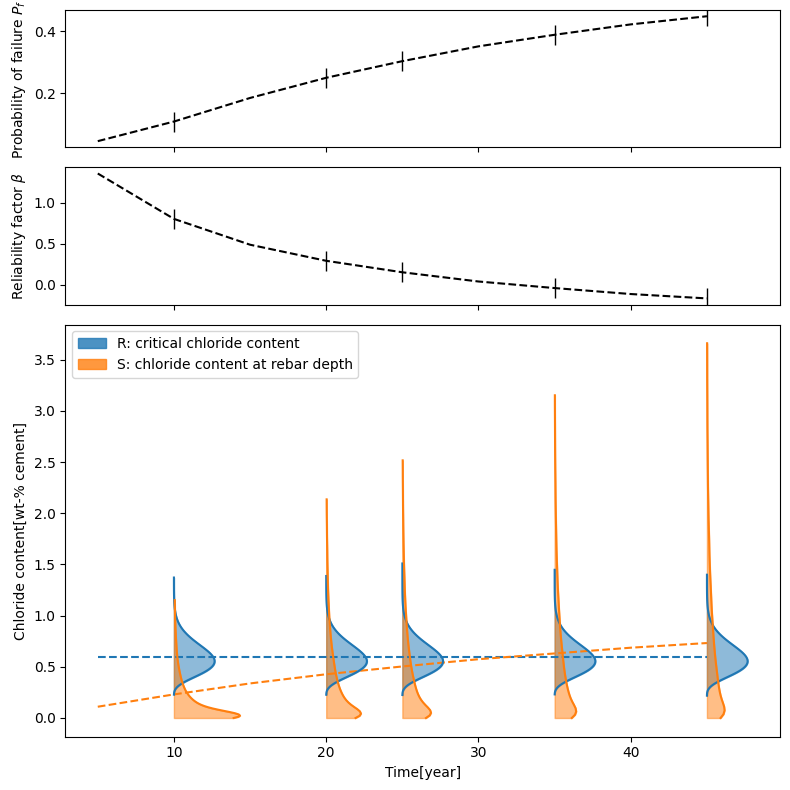

In [8]:
# run model for a list of time steps
t_lis = np.arange(5,50,5)
cover = 50
pf_lis, beta_lis = model_cl_cal.chloride_with_year(depth=cover, year_lis=t_lis,amplify=1)
# fig.savefig('RS_time_chloride.pdf',dpi=1200)
